<a href="https://colab.research.google.com/github/ibonetc/DataAnalytics_Text/blob/master/DA_TwitterAPI_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento del lenguaje natural en Twitter con Python

In [ ]:
import tweepy
import json
import pandas as pd
import numpy as np
import collections

Una forma útil para no tener las claves públicas es generar un json con las credenciales:

Pude seguir este código para autogerarlo o puede crearlo en un fichero texto:

Podemos guardar las claves en un diccionario

```
Keys_tokens = {}
Keys_tokens['CONSUMER_KEY'] = 
Keys_tokens['CONSUMER_SECRET'] = 
Keys_tokens['ACCESS_TOKEN'] = 
Keys_tokens['ACCESS_SECRET'] =
```

y luego guardar el diccionario en un json

```
with open("/content/drive/My Drive/_Credentials/credencials_API_twitter.json", "w") as file:
    json.dump(Keys_tokens, file)

```

Si tenemos los datos ya guardados en un json, al principio sólo los cargamos desde el json

In [ ]:
with open("/content/drive/My Drive/_Credentials/credencials_API_twitter.json", "r") as file:
  creds = json.load(file)

O puede cargar los datos directamente:

```
# Authenticate to Twitter
auth = tweepy.OAuthHandler("CONSUMER_KEY", "CONSUMER_SECRET")
auth.set_access_token("ACCESS_TOKEN","ACCESS_TOKEN_SECRET")
```



In [ ]:
auth = tweepy.OAuthHandler(consumer_key=creds['CONSUMER_KEY'], consumer_secret=creds['CONSUMER_SECRET'])
auth.set_access_token(creds['ACCESS_TOKEN'],creds['ACCESS_SECRET'])

In [ ]:
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
try:
    api.verify_credentials()
except:
    print("Error de autenticación")

Se puede crear una función para establecer esta autenticación

In [ ]:
my_username=api.auth.get_username()
my_username

'ibonetc'

In [ ]:
def connect_Twitter(filename):
  with open(filename, "r") as file:
    creds = json.load(file)
  auth = tweepy.OAuthHandler(consumer_key=creds['CONSUMER_KEY'], consumer_secret=creds['CONSUMER_SECRET'])
  auth.set_access_token(creds['ACCESS_TOKEN'],creds['ACCESS_SECRET'])
  api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
  try:
    api.verify_credentials()
    print(api.auth.get_username()+ ' estás conectado a la API de Twitter')
    return api
  except:
    print("Error de autenticación")

In [ ]:
filename="/content/drive/My Drive/_Credentials/credencials_API_twitter.json"
api=connect_Twitter(filename)

ibonetc estás conectado a la API de Twitter


AppAuthHandler es otra forma de autenticación, con ésta sólo tenemos derecho a realizar búsquedas y no a métodos de usuario o de escritura en twitter

In [ ]:
#auth = tweepy.AppAuthHandler(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

Después de tener cargados los datos pasamos a probar que son correctos, creando un objeto api con los datos de autenticación.

In [ ]:
#api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Tweepy encapsula la API de tweetter para poder acceder de manera más fácil a sus funcionalidades.

En esta biblioteca se nombran 
status=tweet

friendship=follow-follower relationship.

favorite=like.

## Métodos

Tiene diferentes métodos para acceder a los twetts

**Métodos de línea de tiempo**: tienen que ver con la lectura de tweets, menciones y retweets de su línea de tiempo o la línea de tiempo de cualquier otro usuario, siempre que sea público.

***home_timeline ()***, se obtienen las últimas 20 entradas en su línea de tiempo (20 es el valor predeterminado en Tweepy).

Se le puede especificar la cantidad (count), por defecto es 20, lo máximo es 200

Con sucesivas llamadas se puede llegar a obtener un máximo 3200 tweets

In [ ]:
timeline = api.home_timeline(count=200)

In [ ]:
len(timeline)

197

In [ ]:
for tweet in timeline:
  print(tweet.user.name,':', tweet.text)

El Colombiano : El expresidente se movía en el Congreso entre una nube de gente y ruido ¿Habrá impacto en los otros partidos tras s… https://t.co/YF1Z5oKGFa
Facultad de Medicina | Universidad de Antioquia : 👉Esta es una canción espiritual afroamericana que se originó durante el período de la esclavitud, pero no se public… https://t.co/HpXgu9B4J0
El Colombiano : Enviar señales de tranquilidad y recuperar la confianza son algunos de los #RetosDeEpm que señalan cuatro exalcalde… https://t.co/fR2d45JMrx
El Colombiano : Autoridades piden respetar vida de oso adulto avistado en Andes. Video: cortesía Corantioquia. Aquí más información… https://t.co/vTNVxXnIIU
El Colombiano : #EchémonosFlores 💐 | Para usted, ¿cuáles son esas prácticas, gustos, saberes, creencias e ideas que componen la ant… https://t.co/uR6KKJ6dM8
El Colombiano : También se mantiene la restricción de consumo de licor en lugares públicos. Este es el horario de la medida para ho… https://t.co/Getp8BS561
El Colombiano : El gober

***get_user ()*** devuelve un objeto que contiene los detalles del usuario. 

Este objeto tiene métodos para acceder a información relacionada con el usuario. Por ejemplo el atributos *followers* para obtener la lista de seguidores.

In [ ]:
user = api.get_user("ibonetc")
print('Usuario: ',user.name)
print('Descripción: ',user.description)
print('Localización: ', user.location)
print("Últimos seguidores:")
for follower in user.followers():
    print(follower.name)

Usuario:  Isis Bonet
Descripción:  
Localización:  Medellín, Colombia
Últimos seguidores:
Fundasuperior Integral group SAS
Fabio Caraffini
Hugo López
Gesticol Medellin
Idelfonso
Saurav Bhaskar Saha
Diana Montoya
vientosur
Caro Durán
debora
Vi5i7A


***user_timeline*** es un método para buscar los tweets más recientes publicados por el usuario que se autentica o el usuario especificado por *id/ user_id/ screen_name*.

In [ ]:
userTweets=api.user_timeline(screen_name='elcolombiano',count=100)

In [ ]:
len(userTweets)

100

### Métodos para búsqueda


```
# Tiene formato de código
search(q[, geocode][, lang][, locale][, result_type][, count][, until][, since_id][, max_id][, include_entities])
```
*q*: cadena para la búsqueda

*geocode*: se especifica localidad donde fueron emitidos los tweets especificando *“latitide,longitude,radius”*, donde radius puede ser especificado en “mi” (millas) o “km” (kilómetros)

*lang*: especificar lenguaje en código ISO 639-1

*result_type*:

*   mixed: incluye populares y en tiempo real
*   recent: retorna sólo los más recientes
*   popular: retorna sólo los más populares

*until*: fecha máxima para la búsqueda de los tweets. La fecha debe tener el formato AAAA-MM-DD. (Se tiene un límite de 7 días).

*tweet_mode*: 

*   compat: devuelve el texto compactado
*   extended: devuelva el texto completo y no lo trunca

In [ ]:
searchTweets=api.search(q="Inteligencia Artificial", lang="es",count=10)

In [ ]:
for tweet in searchTweets:
  print(tweet.created_at,tweet.user.name,':',tweet.text)

2020-08-25 22:34:17 Luigino Bracci Roa : RT @xataka: Descubren un total de 50 nuevos exoplanetas: para agilizar el proceso una inteligencia artificial se encargó del análisis https…
2020-08-25 22:31:42 Nelly Estrada López : RT @alinerodecambil: #Innovación| “Podemos crear un auxiliar pedagógico inteligente para agilizar la atención a nuestros estudiantes y gara…
2020-08-25 22:31:38 Jorge Nuñez : RT @pressenza: Inteligencia artificial: una introducción https://t.co/YXf9bXq4hE https://t.co/0KyoK5tjzN
2020-08-25 22:31:33 Toño : La inteligencia artificial (#IA) ya pilota un #F_16 mejor que nadie: aplasta por 5-0 a un veterano piloto humano en… https://t.co/1i1zMpCgv2
2020-08-25 22:31:01 Shaggy Doo : RT @arturomfr: La película más antigua de la historia, remasterizada en 4K gracias a la #InteligenciaArtificial. https://t.co/sOYXS5BVML ht…
2020-08-25 22:30:32 FOL Mendizabala : RT @VG_empleoformac: [@VG_Empresas] CONVOCATORIA DE AYUDAS 2020 SOBRE DESARROLLO TECNOLÓGICO BASADO EN INTELIGENCIA 

In [ ]:
searchTweets[0].text

'RT @xataka: Descubren un total de 50 nuevos exoplanetas: para agilizar el proceso una inteligencia artificial se encargó del análisis https…'

Aunque adicionemos tweet_mode='extended' en los retweeted se trunca y el texto completo aparece dentro del atributo retweeted_status

In [ ]:
searchTweets=api.search(q="Inteligencia Artificial", lang="es",count=10, tweet_mode='extended')

In [ ]:
searchTweets[0].retweeted_status.full_text

'Mañana Seminario sobre el poder de la Inteligencia Artificial y el rol de las empresas en la protección los derechos ciudadanos https://t.co/koYukDXXXs'

In [ ]:
tweet=searchTweets[0]

In [ ]:
if 'retweeted_status' in tweet._json:
  print(tweet._json['retweeted_status']['full_text'])
else:
  print(tweet.full_text)

Mañana Seminario sobre el poder de la Inteligencia Artificial y el rol de las empresas en la protección los derechos ciudadanos https://t.co/koYukDXXXs


In [ ]:
print('Cantidad de Tweets: ',len(searchTweets))
searchTweetsH=searchTweets[0:min(10,len(searchTweets))] # Imprimir sólo los primeros 10
for tweet in searchTweetsH:
  print(tweet._json['retweeted_status']['full_text']) if 'retweeted_status' in tweet._json else print(tweet.full_text)

Cantidad de Tweets:  100
2020-08-24 00:42:07 Militza Pérez Morales : @VTVcanal8 @NicolasMaduro Mi querido Presidente @NicolasMaduro hay un detalle que se le escapa para las clases on-line, las videoconferencias entre docentes y estudiantes: los equipos, existen muchos muchísimos docentes y estudiantes que no tienen tecnología con inteligencia artificial...ni VIT ni HAWEI
2020-08-24 00:37:55 ConVdeVioleta : RT @europapress: #LoMásLeído | Cinco años después de su destrucción por DAESH, el antiguo Templo de Bel en Palmira, Siria, ha sido reconstr…
2020-08-24 00:36:26 Daniel Agim Alvarado : RT @lahoranacional: #SabíasQue el científico Raúl Rojas González es pionero de la inteligencia artificial, creador de vehículos autónomos,…
2020-08-24 00:35:32 ZULEYKA PEREZ PIÑATE : RT @Abigarrante: ♻️ La innovadora forma de crear un cuento a través de Inteligencia Artificial... https://t.co/jnIaQEzYyx
2020-08-24 00:34:20 Héctor Ruiz : RT @SEGOB_mx: ¿Quieres sabes más sobre inteligencia artificial? Aco

Si necesito quitar los retweet, se puede adicionar un texto para filtrarlos en la consulta.
***" -filter:retweets"***

In [ ]:
searchTweets=api.search(q="Inteligencia Artificial"+" -filter:retweets", lang="es",count=200, tweet_mode='extended')

In [ ]:
for tweet in searchTweets[0:min(10,len(searchTweets))]:
  print(tweet.created_at,tweet.user.name,':',tweet.full_text)

2020-08-25 22:53:14 David Sánchez : Cómo el avance de la IA para mejorará la atención al cliente https://t.co/F7rzH9VMow
2020-08-25 22:49:12 DironByte 🍋 : Descubren un total de 50 nuevos exoplanetas: para agilizar el proceso una inteligencia artificial se encargó del análisis
Leer más... https://t.co/JLnj4E75pN
2020-08-25 22:48:16 Berto Montilla : Cómo el avance de la IA para mejorará la atención al cliente https://t.co/i6cuoeaAOc
2020-08-25 22:47:00 CEDI - UChile : ¿Puede una inteligencia artificial ser titular de una patente de invención? Una demanda presentada contra la USPTO busca que se considere como inventor al sistema de IA Dabus.

#InteligenciaArtificial #PropiedadIndustrial

https://t.co/AX7GzZdMCG https://t.co/UrSYNCSAzs
2020-08-25 22:46:21 Jean91 : @vanalytics_ai @NiusDiario Os podéis meter vuestra inteligencia artificial por donde dios os puso una raja. Lamebotas del poder.
2020-08-25 22:44:59 Acycly : ¿De qué se trata el 'cuarto chino', el experimento que cuestiona la int

Para poder manipularlos mejor se pueden almacenar en un dataframe

In [ ]:
pd.set_option('display.max_colwidth',2000)

In [ ]:
dic = {'usuario': [], 'fecha': [], 'tweet': [], 'favoritos': []}
for tweet in searchTweets:
  dic['usuario'].append(tweet.user.screen_name)
  dic['fecha'].append(tweet.created_at)
  dic['tweet'].append(tweet.full_text)
  dic['favoritos'].append(tweet.favorite_count)
df=pd.DataFrame(dic)
df.sort_values(by='favoritos', inplace=True, ascending=False)
df['fecha'] = pd.to_datetime(df['fecha']) 
df.head(10)  

,usuario,fecha,tweet,favoritos
45,xataka,2020-08-25 21:49:38,Descubren un total de 50 nuevos exoplanetas: para agilizar el proceso una inteligencia artificial se encargó del análisis https://t.co/DcCAy3N4Au https://t.co/foCSo7i80h,51
76,muyinteresante,2020-08-25 21:00:42,¿Los robots autónomos constituirán una amenaza?\nhttps://t.co/HTw9HsMXvj,14
86,Milenio,2020-08-25 20:50:00,Los científicos planean emplear nuevos métodos tecnológicos para identificar nuevos planetas en un futuro https://t.co/NiUbrI3CaM,10
54,mariamtzc,2020-08-25 21:34:30,"El resumen de lo que está haciendo 🇨🇦a partir de que convocaron científicos/empresas/investigadores para combatir COVID a través se empresas canadienses, van desde hacer mejores hisopos a modificar leyes y uso de inteligencia artificial en hospitales. ¡¡ Me muero de envidia!!! https://t.co/2M1W7IU5o6",7
69,UniversidadesG9,2020-08-25 21:15:36,"Les invitamos a unirse a la transmisión del seminiario virtual de la #RedG9 organizado por la @usantamaria ""Inteligencia Artificial: Impacto en el desarrollo de Chile"" ➡️ https://t.co/IvjgsXYDxm",6
88,Andraki,2020-08-25 20:46:34,"Los que creían que la inteligencia artificial estaba muy lejos ,te la van metiendo de a poquito ,por más que ya sabemos q lo usan pero ahora tú le das el consentimiento y apoyo para hacerlo al apoyar toda esta locura https://t.co/7npiLKAibp",5
38,PrefGuayas,2020-08-25 21:57:50,"La prefecta del Guayas @6SusanaGonzalez recibió a la cónsul de China en Guayaquil, Zhang Tao. \nDurante la visita, determinaron acciones en conjunto para impulsar al sector agrícola, a través de la tecnología y la inteligencia artificial. https://t.co/vt26tIzlXr",4
42,VeroPinilla,2020-08-25 21:53:29,Mañana Seminario sobre el poder de la Inteligencia Artificial y el rol de las empresas en la protección los derechos ciudadanos https://t.co/koYukDXXXs,4
12,cedi_uchile,2020-08-25 22:47:00,¿Puede una inteligencia artificial ser titular de una patente de invención? Una demanda presentada contra la USPTO busca que se considere como inventor al sistema de IA Dabus.\n\n#InteligenciaArtificial #PropiedadIndustrial\n\nhttps://t.co/AX7GzZdMCG https://t.co/UrSYNCSAzs,4
77,CapitalHumanoEE,2020-08-25 21:00:05,La Inteligencia Artificial y la analítica de personas están cambiando la forma en que las empresas atraen y retienen talento.\nhttps://t.co/kW6k1KED7z,3


### Streaming
Los métodos de streaming son usados para extraer tweets en tiempo real.

Una instancia de *tweepy.Stream* establece una sesión para una instancia de *StreamListener*.

Se debe: crear una clase heredada de StreamListener. A partir de esa clase se crea un objeto Stream, y a partir de este se conecta a la API de Twitter.

In [ ]:
#Crear clase que herede de StreamListener y sobreescribir el método on_status
class ClassStreamListener(tweepy.StreamListener):
  def on_status(self, tweet):
    print(tweet.user.name,': ',tweet.text)

  def on_error(self, status):
    print("Error")

In [ ]:
# Crear el objeto de StreamListener y una sesion de Stream
streamL = ClassStreamListener()
oStream = tweepy.Stream(auth = api.auth, listener=streamL)
oStream.filter(track=['COVID', 'Medellín'], languages=['es'])

Graciela Requena :  RT @AlbertoRodNews: ¡Una buena noticia!: Pediatra intensivista del Zulia se recupera del COVID-19. https://t.co/w7bKUAidgF
J ADOLFO MARTINEZ L :  RT @SaludGuanajuato: 🚨Actualización de datos Covid-19 #QuédateEnCasa #SemáforoNARANJA🚦✋No olvides que en el estado de #Guanajuato el uso de…
Jesús Manuel :  RT @tuiterapsuv: #DonarPlasmaSalvaVidas oremos por todas las personas que en este momento están infectados de Covid-19 para que pronto se r…
Doukata Manuel :  RT @BORECITA: Hoy me toco recibir una paciente con Covid+, entró a terapia pidiendo q se comuniquen con hijo, la calmé y le dije q yo misma…
Don Federico :  RT @rquiroga777: Y siempre recuerden, amiguitos, los casos no son comparables entre países.

En Reino Unido la letalidad (fallecidos/casos)…
Pequelandia Alarcon :  RT @EvidenceAid: ¿Por qué es tan importante el #EPI? Es una de las intervenciones que previene la propagación de virus respiratorios como e…
José Luis Fernández :  Por una buena jornada en bici, co

KeyboardInterrupt: ignored

Ese streaming correría hasta llegar al límite permitido.

Para hacer que el streaming se detenga hay que declarar la clase de forma que le pasemos un tiempo límite y que hagamos el stop en ese momento.

In [ ]:
import time
import csv
class ClassStreamListener(tweepy.StreamListener):
  ## En el constructor vamos a declarar las variables de inicio de tiempo y un tiempo límite
  ## Vamos además a pasar un directorio para crear un fichero donde guardemos los tweets
  def __init__(self, time_limit=60, pathfile='', filename='tweetsStreming.json',typefile='json'):
    self.start_time = time.time()
    self.limit = time_limit
    self.typefile=typefile
    self.tweets = []
    self.filetosave = open(pathfile + filename, 'w')
    super(ClassStreamListener, self).__init__()
  
  def on_status(self, status):
    data=status._json
    if (time.time() - self.start_time) < self.limit:
      self.tweets.append(data)
      self.save_json(data)
      return True
    else:
      self.filetosave.close()
      return False ## Este retorno False es el que hace que se detenga

  def on_error(self, status):
    print("Error")

  def save_json(self, data):
    self.filetosave.write( json.dumps(data) + '\n' )

  ### Se puede guardar también en un csv sólo los campos que querramos, por ejemplo:
  ### scream_name, create_at, text, 
  def process_tweet(self, data):
    tweet = {}
    tweet['user'] = data['user']['screen_name']
    tweet['text'] = tweet['retweeted_status']['text'] if 'retweeted_status' in data else tweet['text']
    tweet['date'] = tweet['created_at']
    tweet['location'] = tweet['user']['location']
    return tweet

  def save_csv(self, data):
    tweet=self.process_tweet(data)
    writer = csv.writer(self.filetosave)
    writer.writerow(list(tweet.values()))

In [ ]:
path='/content/drive/My Drive/Analitics_Esp/'
filename='tweetsStreming.json'
tweetsStream = tweepy.Stream(auth=api.auth, listener=ClassStreamListener(time_limit=20,pathfile=path,filename=filename))
tweetsStream.filter(track=['COVID', 'Medellín'], languages=['es','en'])

In [ ]:
tweets_data=tweetsStream.listener.tweets

Cargando los datos desde el json

In [ ]:
tweets_data = []
with open(path+filename, "r") as fileJSON:
  for line in fileJSON:
    tweet = json.loads(line)
    tweets_data.append(tweet)

In [ ]:
tweets_data[0]

Convirtiendo a un DataFrame, con las columnas que nos interesan, por ejemplo, seleccionaremos: fecha(created_at), texto(text), idioma(lang), localización(user.location)

In [ ]:
df = pd.DataFrame(tweets_data, columns=['created_at','text','lang'])
# Adicionar la localizacion del usuario
df['location']=[t['user']['location'] for t in tweets_data]
# Convertir la fecha
df['created_at'] = pd.to_datetime(df.created_at)
df.head(10)

,created_at,text,lang,location
0,2020-08-25 23:29:46+00:00,“El miedo ha sido sustituido por la certeza de estar enfermo”: Dr. Julio Castro dio positivo por Covid-19 -… https://t.co/mLkWkByF32,es,None
1,2020-08-25 23:29:46+00:00,"RT @CNNSitRoom: “Looking back on it now, we learned a lot. Back then we didn’t know how contagious it was,” Boston Mayor @Marty_walsh says…",en,"Denver, CO and Houston, TX"
2,2020-08-25 23:29:46+00:00,"RT @DWUhlfelderLaw: The University of Florida reports 1,002 students were tested for COVID-19 at its Student Health Center with 193 or 19.3…",en,None
3,2020-08-25 23:29:46+00:00,RT @camicattaneoo: Mí fantasía sexual es levantarme un día y no escuchar nunca más la palabra COVID.,es,"Murcia, Región de Murcia"
4,2020-08-25 23:29:46+00:00,RT @FedeGullo7: Dos malas y una buena en Racing\n\nLas malas: Lisandro López y Matías Rojas sufrieron una distensión y se entrenaron diferenc…,es,None
5,2020-08-25 23:29:46+00:00,"Kash Patel, Chief Digital Health Officer, @PennMedicine, reminds #KDD2020 listeners of how much learning happened b… https://t.co/N6PnD4jaB9",en,NH
6,2020-08-25 23:29:46+00:00,i hate it here in the U.S.,en,"Texas, USA"
7,2020-08-25 23:29:47+00:00,RT @camicattaneoo: Mí fantasía sexual es levantarme un día y no escuchar nunca más la palabra COVID.,es,None
8,2020-08-25 23:29:47+00:00,"RT @MeidasTouch: We heard a lot of conspiracies, lies and fear mongering last night. But not a single plan for how we can defeat this pande…",en,"Michigan, USA"
9,2020-08-25 23:29:47+00:00,RT @AlexVita9: @RabbiJill I just heard a GOP congressman trying to excuse DeJoys acts to disrupt our flow of mail because employees are sta…,en,None


In [ ]:
df.shape

(436, 4)

In [ ]:
df.location.value_counts()

Venezuela             9
Florida, USA          7
Caracas, Venezuela    4
Texas, USA            3
United States         3
                     ..
Kevin Sorbo's Head    1
Spain                 1
Boston, MA            1
Miami, Florida        1
Maryland              1
Name: location, Length: 246, dtype: int64

In [ ]:
countLang=df.lang.value_counts()
countLang

en    279
es    157
Name: lang, dtype: int64

Cargar los datos del json

In [ ]:
df.groupby(by='lang').size()

lang
en    279
es    157
dtype: int64

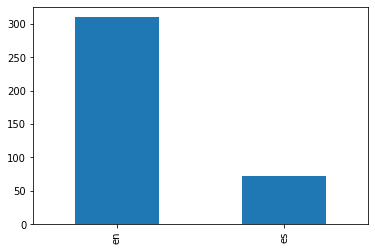

In [ ]:
df.lang.value_counts().plot.bar()

### WordCloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
text = ' '.join(txt for txt in df.text)
len(text)

54661

(-0.5, 399.5, 199.5, -0.5)

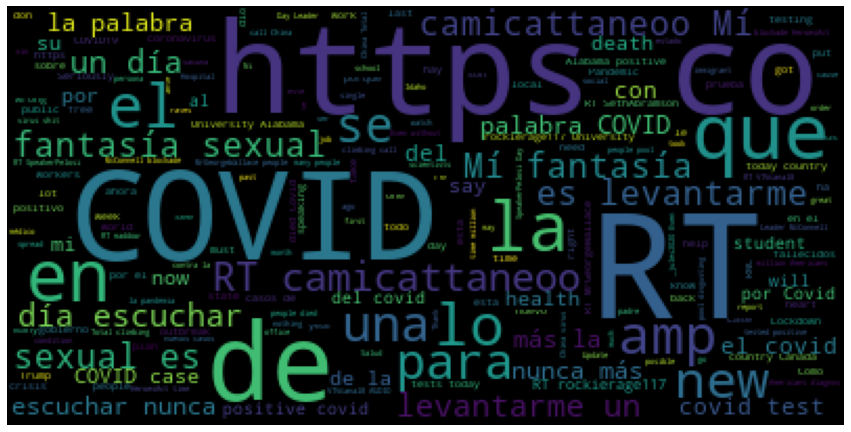

In [ ]:
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

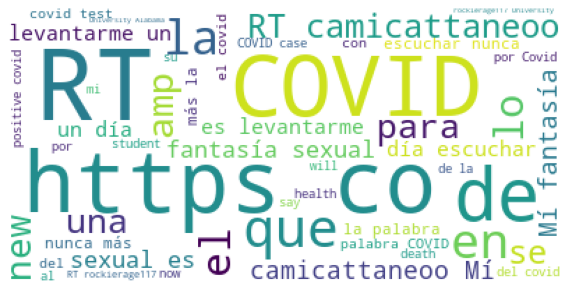

In [ ]:
wordcloud = (WordCloud(background_color="white", 
                      max_words=50) 
                      .generate(text))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud) 
plt.axis("off")

### Frecuencia de palabras

Podemos calcularla basada en el propio wordcloud

In [ ]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq

,0
RT,1.000000
https co,0.706667
COVID,0.680000
de,0.502222
que,0.226667
en,0.191111
la,0.182222
el,0.137778
lo,0.124444
amp,0.106667


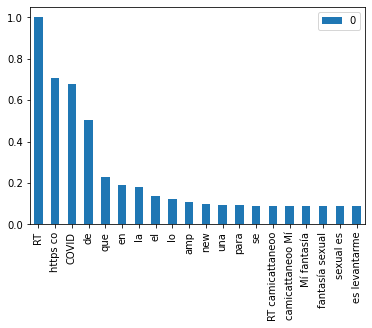

In [ ]:
df_freq = df_freq.head(20)
df_freq.plot.bar()

Podemos dividir los textos en palabras y contarlos.

Podemos llevar a minúsculas primero y luego hacer una 
separación de todo los textos juntos en palabras.

In [ ]:
words_in_tweet =text.lower().split()

In [ ]:
counts_words = collections.Counter(words_in_tweet)
words_top=counts_words.most_common(10)
words, freqs = zip(*counts_words.most_common()[:10])
for w,q in zip(words, freqs):
  print(w,'\t',q)

rt 	 282
the 	 199
a 	 159
de 	 133
of 	 115
covid 	 95
covid-19 	 88
to 	 87
la 	 85
in 	 85


<BarContainer object of 10 artists>

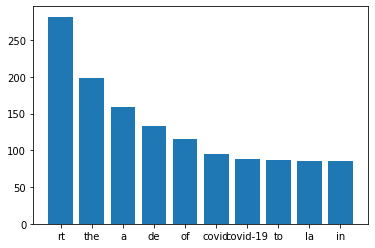

In [ ]:
plt.bar(list(words), list(freqs))

In [ ]:
import plotly.express as px
fig = px.bar(x=list(words), y=list(freqs))
fig.show()

### Geolocalizando tweets

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim()
location = geolocator.geocode(df.location[1])
location.address

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


'Houston, Harris County, Texas, United States of America'

In [ ]:
geolocator = Nominatim()
## [['latitude', 'longitude','address']]
coords = []
for user_loc in df.location:
  try:
    if user_loc is not None:
      location = geolocator.geocode(user_loc)
      if location:
        coords.append([location.latitude, location.longitude,location.address])
  except:
    pass

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
coordsL=collections.Counter([tuple(c) for c in coords])
result=[]
for (lat,lon,place),count in coordsL.items():
  result.append([lat, lon,place,count])

In [ ]:
import folium
from folium.plugins import MarkerCluster
m = folium.Map(zoom_start= 10)
marker_cluster = MarkerCluster().add_to(m)
for r in result:
  folium.Marker(location = [r[0],r[1]], popup= r[2]+': '+str(r[3])).add_to(marker_cluster)
m

### Cursor
La búsquedas en Twitter se realizan por cantidades de páginas, donde cada página se le puede definir una cantidad determinada.
Un forma de volver a hacer varias búsquedas sucesivas teniendo en cuenta que la función search tiene su limitante en cantidad es hacer un ciclo o utilizar el objeto Cursor que tiene esta API y que internamente hace un ciclo en llamadas.

***.Cursor ()*** devuelve un objeto que puede iterar o recorrer para acceder a los datos. Cada elemento del iterador tiene varios atributos a los que puede acceder para obtener información sobre cada tweet.

Este objeto tiene dos método:

items(N)

pages(N)

donde N es la cantidad de elementos por página en items o de páginas en pages, que se quieren iterar.
Una página tiene una lista de statuses

In [ ]:
query="COVID Medellín"+" -filter:retweets"
tweetsCursor=tweepy.Cursor(api.search, q=query, since = "2020-07-05", lang="es", tweet_mode='extended', count = 100)

In [ ]:
query="COVID Medellín"+" -filter:retweets"
dfM = pd.DataFrame(columns = ['tweet', 'user', 'user_followers', 'user_location', 'fav_count', 'rt_count', 'tweet_date'])
i=0
for tweet in tweetsCursor.items():
  dfM.loc[i, 'tweet'] = tweet.full_text
  dfM.loc[i, 'user'] = tweet.user.name
  dfM.loc[i, 'user_followers'] = tweet.user.followers_count
  dfM.loc[i, 'user_location'] = tweet.user.location
  dfM.loc[i, 'fav_count'] = tweet.favorite_count
  dfM.loc[i, 'rt_count'] = tweet.retweet_count
  dfM.loc[i, 'tweet_date'] = tweet.created_at
  i+=1

In [ ]:
dfM.shape

(472, 7)

Crear un DataFrame con los datos de búsqueda. Si no se le pasa un número máximo de tweets, puede quedarse corriendo, con esperas al alcanzar el límite.

In [ ]:
query="COVID Colombia"+" -filter:retweets"
df = pd.DataFrame(columns = ['tweet', 'user', 'user_followers', 'user_location', 'fav_count', 'rt_count', 'tweet_date'])
i=0
for tweet in tweepy.Cursor(api.search, q=query, since = "2020-08-01", lang="es", tweet_mode='extended').items(2000):
  df.loc[i, 'tweet'] = tweet.full_text
  df.loc[i, 'user'] = tweet.user.name
  df.loc[i, 'user_followers'] = tweet.user.followers_count
  df.loc[i, 'user_location'] = tweet.user.location
  df.loc[i, 'fav_count'] = tweet.favorite_count
  df.loc[i, 'rt_count'] = tweet.retweet_count
  df.loc[i, 'tweet_date'] = tweet.created_at
  i+=1

In [ ]:
df.shape

(2568, 7)

In [ ]:
min(df.tweet_date)

datetime.datetime(2020, 8, 23, 2, 0)

Si los quiero guardar en un excel

In [ ]:
filename=path+'searchTweets'
df.to_excel(filename+'.xlsx')

### Conversión de fechas a una zona horaria específica

Ejemplo: Ver los tweets del profile de la cuenta de RCN

In [ ]:
screen_name="CaracolTV"
exampleTweetsRCN=api.user_timeline(screen_name=screen_name, since = "2020-08-01", lang="es", tweet_mode='extended')

In [ ]:
exampleTweetsRCN[0]._json

In [ ]:
from pytz import timezone

In [ ]:
created_at=exampleTweetsRCN[0].created_at
print(exampleTweetsRCN[0].created_at)
tz = timezone('America/Bogota')
tz_utc=timezone('UTC')
utc_created_at = tz_utc.localize(created_at)
print(utc_created_at)
col_created_at = utc_created_at.astimezone(tz)
print(col_created_at)


2020-08-25 17:36:19
2020-08-25 17:36:19+00:00
2020-08-25 12:36:19-05:00


In [ ]:
def datetime_from_utc_to_local(date,tz):
  tz_utc=timezone('UTC')
  utc_created_at = tz_utc.localize(created_at)
  col_created_at = utc_created_at.astimezone(tz)
  return col_created_at

In [ ]:
print(exampleTweetsRCN[0].created_at)
datetime_from_utc_to_local(exampleTweetsRCN[0].created_at,timezone('America/Bogota'))

2020-08-25 17:36:19


datetime.datetime(2020, 8, 25, 12, 36, 19, tzinfo=<DstTzInfo 'America/Bogota' -05-1 day, 19:00:00 STD>)

Si la conversión la hacemos desde el DataFrame puede ser más directo. con la función *tweet_date.dt.tz_localize('UTC').dt.tz_convert('America/Bogota')* del DataFrame

In [ ]:
df.head()

In [ ]:
df['tweet_date'] = df.tweet_date.dt.tz_localize('UTC').dt.tz_convert('America/Bogota')

In [ ]:
df.head()

,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,#LaVenganzaDeAnalía | Luego de liderar el pri...,Caracol Televisión,4083789,Colombia,10,1,2020-08-25 12:28:17-05:00,[LaVenganzaDeAnalía],[]
1,Vía @Regias\n#Famosos | Salomé Rodríguez regañ...,Caracol Televisión,4083789,Colombia,3,0,2020-08-25 12:15:38-05:00,[Famosos],[Regias]
2,Vía @Regias \n#Famosos | La influenciadora con...,Caracol Televisión,4083789,Colombia,2,0,2020-08-25 12:03:00-05:00,[Famosos],[Regias]
3,"Vía @Regias\n#Famosos | Por supuesto, luego de...",Caracol Televisión,4083789,Colombia,5,0,2020-08-25 11:42:34-05:00,[Famosos],[Regias]
4,"#RafaelOrozco, el ídolo | Luego de la insisten...",Caracol Televisión,4083789,Colombia,3,1,2020-08-25 11:35:00-05:00,[RafaelOrozco],[]


In [ ]:
print(min(df.tweet_date), max(df.tweet_date))

2020-08-13 08:47:59-05:00 2020-08-25 12:28:17-05:00


In [ ]:
df.tweet_date[0].day

25

Graficar cantidad de tweets por día

In [ ]:
df['day']=[t.day for t in df.tweet_date] ## Crear una columan con el día

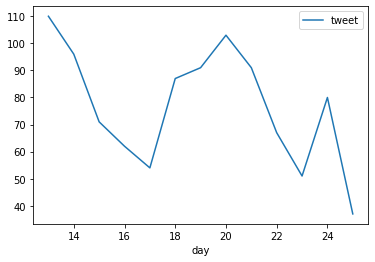

In [ ]:
tweets_rt_by_day = df[['tweet']].groupby(df['day']).count()
tweets_rt_by_day.plot()

Graficar cantidad de retweets por día

In [ ]:
tweets_rt_by_day = df[['rt_count']].groupby(df['day']).sum()

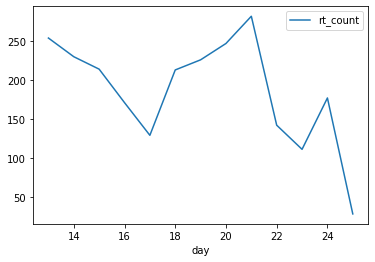

In [ ]:
tweets_rt_by_day.plot()

Otra opción si no adiconé la columna day al DataFrame

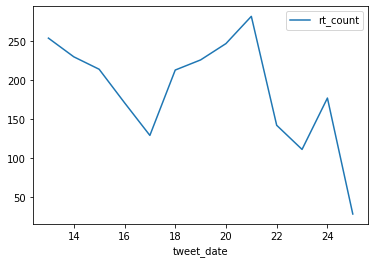

In [ ]:
tweets_rt_by_day = df[['tweet_date','rt_count']].groupby(df['tweet_date'].map(lambda x: x.day)).sum()
tweets_rt_by_day.plot()

In [ ]:
df.to_csv(path+'CaracolTV.csv')

### Bots in Twitter

Un bot es un programa que escucha y reacciona ante determinada condición.

Se puede hacer bots para ir viendo información de Twitter en tiempo real y cuando ocurra alguna acción que estemos esperando actuar.

Ejemplos de bots:


*   Seguir a los que me sigan en Twitter
*   Dar like a unos tweets que sigan con alguna condición de búsqueda.

Para el primero podemos ver el ejemplo a continuación.

Para el segundo se pudiera hacer un streaming y sobreescribir el método on_status donde podemos ver si el tweet cumple con la condición que queremos, incluso si es un tweet negativo o positivo sobre ese tema, y en dependencia de eso entonces dar un like.

```
if not tweet.favorited:
  tweet.favorite()
```





In [ ]:
def follow_followers(api):
  newfollower=[]
  for follower in tweepy.Cursor(api.followers).items():
    if not follower.following:
      #newfollower.append[follower.name]
      print(follower.name)
      follower.follow()

Esta función se puede llamar cada minuto por ejemplo

In [ ]:
while True:
  follow_followers(api)
  time.sleep(60)

Fundasuperior Integral group SAS
Fabio Caraffini
Hugo López
Gesticol Medellin
Idelfonso
Saurav Bhaskar Saha
Diana Montoya
vientosur
Caro Durán
debora


KeyboardInterrupt: ignored

Por supuesto que la idea de hacer un bot es ponerlo en un servidor.

Se puede empaquetar el bot usando Docker y luego implementarlo en un servidor.

Se puede crear una instancia en AWS y cargar la imagen Docker